In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [325]:
df = pd.read_csv('output.csv')

In [327]:
df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [328]:
df.insert(0,'sec1',1 ,allow_duplicates=True)
df.insert(1,'sec2',1 ,allow_duplicates=True)
df

,sec1,sec2,Year,Month,State,County,Rate
0,1,1,2015,February,Mississippi,Newton County,6.1
1,1,1,2015,February,Mississippi,Panola County,9.4
2,1,1,2015,February,Mississippi,Monroe County,7.9
3,1,1,2015,February,Mississippi,Hinds County,6.1
4,1,1,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...,...,...
885543,1,1,2009,November,Maine,Somerset County,10.5
885544,1,1,2009,November,Maine,Oxford County,10.5
885545,1,1,2009,November,Maine,Knox County,7.5
885546,1,1,2009,November,Maine,Piscataquis County,11.3


In [331]:
print(pd.unique(df.Year))
print(pd.unique(df.sec1))
print(pd.unique(df.Month))
print(pd.unique(df.Rate))

[2015 2014 2016 2011 2010 2013 2012 1991 1990 1993 1992 1995 1994 1997
 1996 1999 1998 2002 2003 2000 2001 2006 2007 2004 2005 2008 2009]
[1]
['February' 'October' 'March' 'August' 'May' 'January' 'June' 'September'
 'April' 'December' 'July' 'November']
[ 6.1  9.4  7.9 10.6  6.9 14.3  4.5 11.1 11.5  7.6  5.5  8.6  4.7  5.9
  5.   7.4  7.5  5.7 12.6  6.6  8.3  8.5  8.2  7.7  7.3  6.2  7.2 12.1
 10.3  8.1  5.6 15.4 11.3 11.7  7.1  6.8  5.8  5.4 11.4 13.   6.7  6.
  7.   4.8  9.8  4.1 21.5  6.4  8.7 13.3  8.4  6.3  7.8  2.6  6.5  2.8
  4.3  3.7  3.9  3.4  3.5  3.6  2.5  4.   4.2  3.   3.8  2.2  4.4  5.3
  3.3  9.3  2.1  5.2  2.9  4.9  4.6  9.5  5.1 12.7  3.1  8.   9.2  8.9
 10.1  8.8  9.6 11.9 10.2  9.  21.2 10.4 10.8 11.  15.6 10.   9.9 12.2
 10.5 10.9 16.  16.1  9.1  3.2 10.7  9.7 19.  14.4  2.4  2.3  2.7 14.5
 15.  14.  13.8 11.8 13.9 22.3 12.3 22.8 12.4 12.  13.4 11.2 14.1 16.7
 14.2 14.7 11.6  1.8  1.6 13.1  1.9  2.   1.7 15.5 18.4 14.6 12.8 12.5
  1.4  1.3 24.5  1.5  1.2 13.5 13.6 

In [332]:
df.loc[df.Year == 1990, "sec1"] = 1
df.loc[df.Year == 1991, "sec1"] = 2
df.loc[df.Year == 1992, "sec1"] = 3
df.loc[df.Year == 1993, "sec1"] = 4
df.loc[df.Year == 1994, "sec1"] = 5
df.loc[df.Year == 1995, "sec1"] = 6
df.loc[df.Year == 1996, "sec1"] = 7
df.loc[df.Year == 1997, "sec1"] = 8
df.loc[df.Year == 1998, "sec1"] = 9
df.loc[df.Year == 1999, "sec1"] = 10
df.loc[df.Year == 2000, "sec1"] = 11
df.loc[df.Year == 2001, "sec1"] = 12
df.loc[df.Year == 2002, "sec1"] = 13
df.loc[df.Year == 2003, "sec1"] = 14
df.loc[df.Year == 2004, "sec1"] = 15
df.loc[df.Year == 2005, "sec1"] = 16
df.loc[df.Year == 2006, "sec1"] = 17
df.loc[df.Year == 2007, "sec1"] = 18
df.loc[df.Year == 2008, "sec1"] = 19
df.loc[df.Year == 2009, "sec1"] = 20
df.loc[df.Year == 2010, "sec1"] = 21
df.loc[df.Year == 2011, "sec1"] = 22
df.loc[df.Year == 2012, "sec1"] = 23
df.loc[df.Year == 2013, "sec1"] = 24
df.loc[df.Year == 2014, "sec1"] = 25
df.loc[df.Year == 2015, "sec1"] = 26
df.loc[df.Year == 2016, "sec1"] = 27
df.loc[df.Month == 'January', "sec2"] = 1
df.loc[df.Month == 'February', "sec2"] = 2
df.loc[df.Month == 'March', "sec2"] = 3
df.loc[df.Month == 'April', "sec2"] = 4
df.loc[df.Month == 'May', "sec2"] = 5
df.loc[df.Month == 'June', "sec2"] = 6
df.loc[df.Month == 'July', "sec2"] = 7
df.loc[df.Month == 'August', "sec2"] = 8
df.loc[df.Month == 'September', "sec2"] = 9
df.loc[df.Month == 'October', "sec2"] = 10
df.loc[df.Month == 'November', "sec2"] = 11
df.loc[df.Month == 'December', "sec2"] = 12
df

,sec1,sec2,Year,Month,State,County,Rate
0,26,2,2015,February,Mississippi,Newton County,6.1
1,26,2,2015,February,Mississippi,Panola County,9.4
2,26,2,2015,February,Mississippi,Monroe County,7.9
3,26,2,2015,February,Mississippi,Hinds County,6.1
4,26,2,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...,...,...
885543,20,11,2009,November,Maine,Somerset County,10.5
885544,20,11,2009,November,Maine,Oxford County,10.5
885545,20,11,2009,November,Maine,Knox County,7.5
885546,20,11,2009,November,Maine,Piscataquis County,11.3


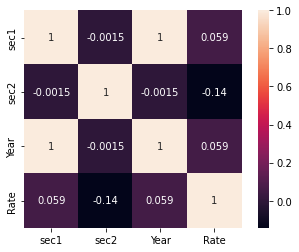

In [333]:
sns.heatmap(df.corr(), annot = True, square = True);

In [334]:
option = ['November']
rd=df[df['Month'].isin(option)]
rd

,sec1,sec2,Year,Month,State,County,Rate
30796,26,11,2015,November,Mississippi,Newton County,5.8
30797,26,11,2015,November,Mississippi,Panola County,8.0
30798,26,11,2015,November,Mississippi,Monroe County,6.8
30799,26,11,2015,November,Mississippi,Hinds County,5.7
30800,26,11,2015,November,Mississippi,Kemper County,9.3
...,...,...,...,...,...,...,...
885543,20,11,2009,November,Maine,Somerset County,10.5
885544,20,11,2009,November,Maine,Oxford County,10.5
885545,20,11,2009,November,Maine,Knox County,7.5
885546,20,11,2009,November,Maine,Piscataquis County,11.3


In [68]:
#df = df.drop(columns="Year")
#df

,Year,Month,State,County,Rate
0,1990,February,Mississippi,Newton County,6.1
1,1990,February,Mississippi,Panola County,9.4
2,1990,February,Mississippi,Monroe County,7.9
3,1990,February,Mississippi,Hinds County,6.1
4,1990,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...
885543,1990,November,Maine,Somerset County,10.5
885544,1990,November,Maine,Oxford County,10.5
885545,1990,November,Maine,Knox County,7.5
885546,1990,November,Maine,Piscataquis County,11.3


In [335]:
des_x = df[['sec2']]

In [336]:
des_y = df[['Rate']]

In [337]:
regr = linear_model.LinearRegression()

In [338]:
regr.fit(des_x, des_y)

LinearRegression()

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
desx_train, desx_test, desy_train, desy_test = train_test_split(
                      des_x, des_y, test_size=0.30, random_state=42)


In [341]:
regl = linear_model.LinearRegression()

In [342]:
regl.fit(desx_train, desy_train) 
print(regl.score(desx_test, desy_test))

0.020171346771208798


In [343]:
regl_pred=regl.predict(desx_test)

In [344]:
# los coeficientes
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [[-0.12839659]]


In [345]:
# El error cuadratico medio
print("Mean squared error: %.2f" % mean_squared_error(desx_test, regl_pred))

Mean squared error: 15.29


In [346]:
# El coeficientes de determinación: 1 es predicción perfecta
print("Coefficient of determination: %.2f" % r2_score(desy_test, regl_pred))

Coefficient of determination: 0.02


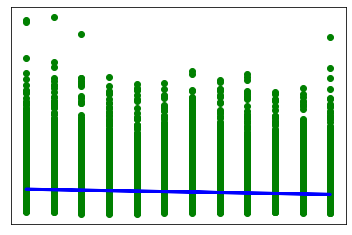

In [348]:
# Plot outputs
plt.scatter(desx_test, desy_test, color="green")
plt.plot(desx_test, regl_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# **# Regresión Logística**

In [384]:
df = pd.read_csv('output.csv')

In [388]:
df.head()

,sec1,Year,Month,State,County,Rate
0,1,2015,February,Mississippi,Newton County,6.1
1,1,2015,February,Mississippi,Panola County,9.4
2,1,2015,February,Mississippi,Monroe County,7.9
3,1,2015,February,Mississippi,Hinds County,6.1
4,1,2015,February,Mississippi,Kemper County,10.6


In [387]:
df.insert(0,'sec1',1 ,allow_duplicates=True)
df

,sec1,Year,Month,State,County,Rate
0,1,2015,February,Mississippi,Newton County,6.1
1,1,2015,February,Mississippi,Panola County,9.4
2,1,2015,February,Mississippi,Monroe County,7.9
3,1,2015,February,Mississippi,Hinds County,6.1
4,1,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...,...
885543,1,2009,November,Maine,Somerset County,10.5
885544,1,2009,November,Maine,Oxford County,10.5
885545,1,2009,November,Maine,Knox County,7.5
885546,1,2009,November,Maine,Piscataquis County,11.3


In [363]:
ndf = np.array[indices.astype(int)]

NameError: ignored

In [396]:
df.loc[df.Rate < 35, "sec1"] = 0
df.loc[df.Rate > 67, "sec1"] = 2
df.loc[(df.Rate > 35) & (df.Rate < 68), "sec1"] = 1
df

,sec1,Year,Month,State,County,Rate
0,0,2015,February,Mississippi,Newton County,6.1
1,0,2015,February,Mississippi,Panola County,9.4
2,0,2015,February,Mississippi,Monroe County,7.9
3,0,2015,February,Mississippi,Hinds County,6.1
4,0,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...,...
885543,0,2009,November,Maine,Somerset County,10.5
885544,0,2009,November,Maine,Oxford County,10.5
885545,0,2009,November,Maine,Knox County,7.5
885546,0,2009,November,Maine,Piscataquis County,11.3


In [402]:
print(pd.unique(df.sec1))

[0 1]


In [403]:
df.insert(1,'sec2',1 ,allow_duplicates=True)
df

,sec1,sec2,Year,Month,State,County,Rate
0,0,1,2015,February,Mississippi,Newton County,6.1
1,0,1,2015,February,Mississippi,Panola County,9.4
2,0,1,2015,February,Mississippi,Monroe County,7.9
3,0,1,2015,February,Mississippi,Hinds County,6.1
4,0,1,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...,...,...
885543,0,1,2009,November,Maine,Somerset County,10.5
885544,0,1,2009,November,Maine,Oxford County,10.5
885545,0,1,2009,November,Maine,Knox County,7.5
885546,0,1,2009,November,Maine,Piscataquis County,11.3


In [404]:
df.loc[df.Month == 'January', "sec2"] = 1
df.loc[df.Month == 'February', "sec2"] = 2
df.loc[df.Month == 'March', "sec2"] = 3
df.loc[df.Month == 'April', "sec2"] = 4
df.loc[df.Month == 'May', "sec2"] = 5
df.loc[df.Month == 'June', "sec2"] = 6
df.loc[df.Month == 'July', "sec2"] = 7
df.loc[df.Month == 'August', "sec2"] = 8
df.loc[df.Month == 'September', "sec2"] = 9
df.loc[df.Month == 'October', "sec2"] = 10
df.loc[df.Month == 'November', "sec2"] = 11
df.loc[df.Month == 'December', "sec2"] = 12
df

,sec1,sec2,Year,Month,State,County,Rate
0,0,2,2015,February,Mississippi,Newton County,6.1
1,0,2,2015,February,Mississippi,Panola County,9.4
2,0,2,2015,February,Mississippi,Monroe County,7.9
3,0,2,2015,February,Mississippi,Hinds County,6.1
4,0,2,2015,February,Mississippi,Kemper County,10.6
...,...,...,...,...,...,...,...
885543,0,11,2009,November,Maine,Somerset County,10.5
885544,0,11,2009,November,Maine,Oxford County,10.5
885545,0,11,2009,November,Maine,Knox County,7.5
885546,0,11,2009,November,Maine,Piscataquis County,11.3


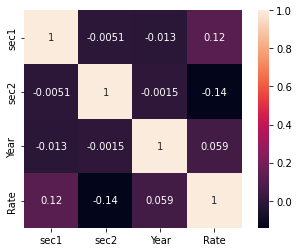

In [407]:
sns.heatmap(df.corr(), annot = True, square = True);

In [409]:
des_x = df[['Year']]

In [411]:
des_y = df[['sec2']]

In [414]:
logreg = LogisticRegression()

In [416]:
logreg.fit(des_x,des_y)

Y_pred = logreg.predict(des_x)
acc_log = round(logreg.score(des_x, des_y) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.42